### Import packages

In [6]:
#Calculations
import math
import numpy as np

#Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import colors, cm, ticker
from mpl_toolkits.axes_grid.inset_locator import inset_axes

    
#Other
from ring_simulation_tools import *
from waiting_time_tools import *
from entropy_tools import *

### Set Latex plot font

In [7]:
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family']      = 'STIXGeneral'
mpl.rcParams["mathtext.fontset"] = "cm"
mpl.rcParams.update({'errorbar.capsize': 4})
mpl.rcParams['axes.linewidth'] = 2

### Set constants for ring system with uniform bias

In [292]:
Nsteps = 2*10**6   #Number of steps
Nmacro = 8       #Number of observable macrostates
Nmicro = 4       #Number of hidden microstates
Nmilestones = 3  #Number of milestones
pbiasmacro = 0.5 #Probability current between macrostates
pbiasmicro = 0.5 #Probability current between microstates
modelB = True   #Model A (shown in Figure 1a) or model B (shown in Figure S1a)

### Run ring system with uniform bias

In [293]:
%%time
full_traj, lump_traj, mil_traj = ringgenerator(Nmacro,Nmicro,Nsteps,Nmilestones,pbiasmacro,pbiasmicro,modelB)

CPU times: user 186 ms, sys: 0 ns, total: 186 ms
Wall time: 191 ms


### Determine backward milestoned trajectory (to show kinetic hysteresis)

In [300]:
#Set step limit
step_lim = 300

#Compute milestoned backward trajectory
milestonelist          = np.ceil(Nmacro*np.arange(0,Nmilestones,1)/Nmilestones)
mil_traj_back, counter = np.zeros((step_lim)), 0
for i in range(step_lim): 
    if lump_traj[step_lim-1-i] in milestonelist: 
        mil_traj_back[step_lim-1-i] = np.where(lump_traj[step_lim-1-i] == milestonelist)[0]
        if counter == 0: counter = i
    elif i != 0: mil_traj_back[step_lim-1-i] = mil_traj_back[step_lim-i]

#Set initial milestone in the backward trajectory
mil_traj_back[step_lim-counter:step_lim] = mil_traj_back[step_lim-1-counter]

### Plot trajectories (forward and backward in time)

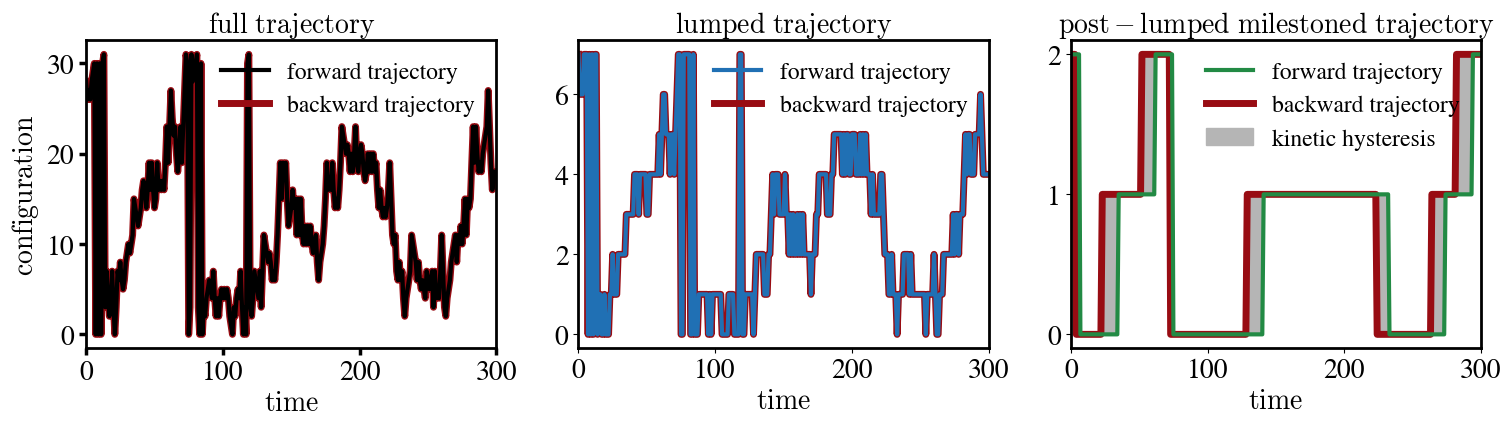

In [304]:
#Figure settings
fig, ax = plt.subplots(1,3, figsize = (18,4))
ax.ravel()
        
#Plot forward trajectories
ax[0].plot(full_traj[0:step_lim], linewidth = 3, label = r'forward trajectory', color = 'black');
ax[1].plot(lump_traj[0:step_lim], linewidth = 3, label = r'forward trajectory', color = cm.Blues(0.75));
ax[2].plot(mil_traj[0:step_lim], linewidth = 3, label = r'forward trajectory',  color = cm.Greens(0.75));

#Plot backward trajectories
ax[0].plot(full_traj[0:step_lim], label = r'backward trajectory', linewidth = 5, color = cm.Reds(0.9), zorder = -1);
ax[1].plot(lump_traj[0:step_lim], label = r'backward trajectory', linewidth = 5, color = cm.Reds(0.9), zorder = -1);
ax[2].plot(mil_traj_back,         label = r'backward trajectory', linewidth = 5, color = cm.Reds(0.9),         zorder = -1);

#Explicitly highlight the kinetic hysteresis
ax[2].fill_between(np.arange(0, step_lim, 1), mil_traj[0:step_lim], mil_traj_back, color = cm.Greys(0.4), zorder = -2, label = r'kinetic hysteresis')

#Set labels
ax[0].set_xlabel(r'${\rm time}$', size = 20);
ax[1].set_xlabel(r'${\rm time}$', size = 20);
ax[2].set_xlabel(r'${\rm time}$', size = 20);
ax[0].set_ylabel(r'$\rm configuration$', size = 20);

#Set axis limits
ax[0].set_xlim([0,step_lim]);
ax[1].set_xlim([0,step_lim]);
ax[2].set_xlim([0,step_lim]);

#Set axis ticks
ax[2].set_yticks([0,1,2],['0','1','2'])

#Set tick sizes
ax[0].tick_params('both', length=5, width=2.5, which='major');
ax[0].xaxis.set_tick_params(labelsize=20), ax[0].yaxis.set_tick_params(labelsize=20);
ax[1].xaxis.set_tick_params(labelsize=20), ax[1].yaxis.set_tick_params(labelsize=20);
ax[2].xaxis.set_tick_params(labelsize=20), ax[2].yaxis.set_tick_params(labelsize=20);

#Add titles
ax[0].set_title(r'$\rm full \ trajectory$',                     fontsize = 20);
ax[1].set_title(r'$\rm lumped \ trajectory$',                   fontsize = 20);
ax[2].set_title(r'$\rm post-lumped \ milestoned \ trajectory$', fontsize = 20);

#Plot legend
ax[0].legend(frameon = False, fontsize = 17);
ax[1].legend(frameon = False, fontsize = 17);
ax[2].legend(frameon = False, fontsize = 17);

#Save figure
plt.savefig('./Plots/ring_kinetic_hysteresis.pdf', bbox_inches = 'tight', dpi = 100)

### Plot waiting-time distributions for milestoned trajectory  (this only works when Nmilestones = 3)

In [166]:
#Collect waiting-time statistics for each of the three milestones
psi0min, psi0plus, psi1plus, psi1min, psi2min, psi2plus = waiting_time_module(mil_traj)

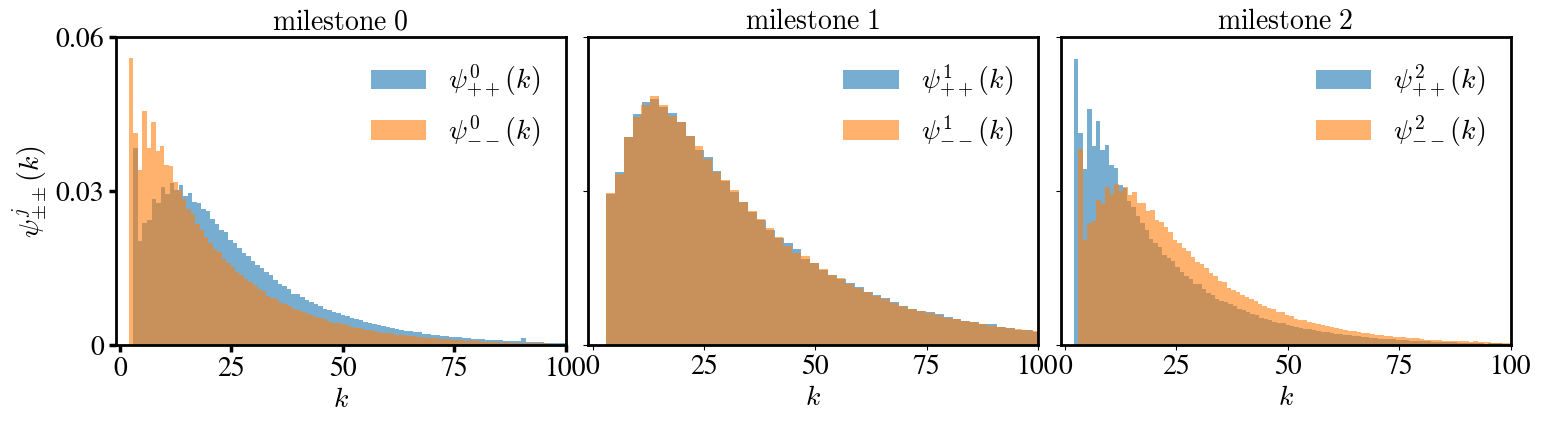

In [199]:
#Figure settings
fig, ax = plt.subplots(1,3, figsize = (18,4), sharey = True)
ax.ravel()

#Compute histograms
counts1, bins1 = np.histogram(psi0min,  bins = 315)
counts2, bins2 = np.histogram(psi0plus, bins = 260)
counts3, bins3 = np.histogram(psi1min,  bins = 182)
counts4, bins4 = np.histogram(psi1plus, bins = 178)
counts5, bins5 = np.histogram(psi2min,  bins = 275)
counts6, bins6 = np.histogram(psi2plus, bins = 280)

#Plot histograms
ax[0].stairs(counts2/np.sum(counts2), bins2, fill = True, alpha = 0.6, label = r'$\psi^{0}_{++}(k)$')
ax[0].stairs(counts1/np.sum(counts1), bins1, fill = True, alpha = 0.6, label = r'$\psi^{0}_{--}(k)$')

ax[1].stairs(counts4/np.sum(counts4), bins4, fill = True, alpha = 0.6, label = r'$\psi^{1}_{++}(k)$')
ax[1].stairs(counts3/np.sum(counts3), bins3, fill = True, alpha = 0.6, label = r'$\psi^{1}_{--}(k)$')

ax[2].stairs(counts6/np.sum(counts6), bins6, fill = True, alpha = 0.6, label = r'$\psi^{2}_{++}(k)$')
ax[2].stairs(counts5/np.sum(counts5), bins5, fill = True, alpha = 0.6, label = r'$\psi^{2}_{--}(k)$')

#Set tick sizes
ax[0].tick_params('both', length=5, width=2.5, which='major');
ax[0].xaxis.set_tick_params(labelsize=20), ax[0].yaxis.set_tick_params(labelsize=20);
ax[1].xaxis.set_tick_params(labelsize=20), ax[1].yaxis.set_tick_params(labelsize=20);
ax[2].xaxis.set_tick_params(labelsize=20), ax[2].yaxis.set_tick_params(labelsize=20);

#Add titles
ax[0].set_title(r'$\rm milestone \ 0$', fontsize = 20);
ax[1].set_title(r'$\rm milestone \ 1$', fontsize = 20);
ax[2].set_title(r'$\rm milestone \ 2$', fontsize = 20);

#Set labels
ax[0].set_xlabel(r'$k$', size = 20);
ax[1].set_xlabel(r'$k$', size = 20);
ax[2].set_xlabel(r'$k$', size = 20);
ax[0].set_ylabel(r'$\psi^{j}_{\pm\pm}(k)$', size = 20);

#Set axis-limits
axlim = 100
ax[0].set_xlim([-1,axlim]);
ax[1].set_xlim([-1,axlim]);
ax[2].set_xlim([-1,axlim]);

#Set axis ticks
ax[0].set_yticks([0,0.03,0.06],['0','0.03','0.06'])

#Adjust width subplots
plt.subplots_adjust(wspace=0.05, hspace = -0.65)

#Plot legend
ax[0].legend(frameon = False, fontsize = 20);
ax[1].legend(frameon = False, fontsize = 20);
ax[2].legend(frameon = False, fontsize = 20);

#Save figure
plt.savefig('./Plots/waiting_time_distribution_ringB.pdf', bbox_inches = 'tight', dpi = 100)

### Save waiting-time distributions

In [200]:
np.save('psi0minringB.npy',  psi0min,  allow_pickle=True, fix_imports=True)
np.save('psi0plusringB.npy', psi0plus, allow_pickle=True, fix_imports=True)
np.save('psi1minringB.npy',  psi1min,  allow_pickle=True, fix_imports=True)
np.save('psi1plusringB.npy', psi1plus, allow_pickle=True, fix_imports=True)
np.save('psi2minringB.npy',  psi2min,  allow_pickle=True, fix_imports=True)
np.save('psi2plusringB.npy', psi2plus, allow_pickle=True, fix_imports=True)

### Model A: Calculate entropy production for various lumped and hidden states

In [6]:
#Set constants
Nsteps = 10**6
Nmilestones = 4
pbias = 0.4
Nmicrostates = 9

#Initialize arrays
QA1_lumped = np.zeros((6,Nmicrostates))
QA2_lumped = np.zeros((6,Nmicrostates))
QA1_mil    = np.zeros((6,Nmicrostates))
QA2_mil    = np.zeros((6,Nmicrostates))

In [7]:
%%time
for i in range(1,7):
    for j in range(2,2+Nmicrostates):

        #Construct trajectories (0)
        full_traj, lump_traj, mil_traj = ringgenerator(4*i,j,Nsteps,Nmilestones,pbias,pbias,False)
        
        #Calculate entropy production
        exact_entropy = markov_entropy_calculator(full_traj,1)
        lump1_entropy = markov_entropy_calculator(lump_traj,1)
        mil1_entropy  = markov_entropy_calculator(mil_traj,1)
        lump2_entropy = semi_markov_entropy_module(lump_traj,2)
        mil2_entropy  = semi_markov_entropy_module(mil_traj,2)
        
        #Calculate quality factors
        QA1_lumped[i-1,j-2] = lump1_entropy/exact_entropy
        QA1_mil[i-1,j-2]    = mil1_entropy/exact_entropy
        QA2_lumped[i-1,j-2] = lump2_entropy/exact_entropy
        QA2_mil[i-1,j-2]    = mil2_entropy/exact_entropy
        
        #print(exact_entropy, lump1_entropy, mil1_entropy)
        print(i,j,QA1_lumped[i-1,j-2],QA1_mil[i-1,j-2],QA2_lumped[i-1,j-2],QA2_mil[i-1,j-2])

1 2 0.49943888961518434 0.4994298167586701 1.0011295302975372 1.001133625033148
1 3 0.23268890488470423 0.23268275393316598 0.5373166777309882 0.5373194947059055
1 4 0.13844704584214076 0.13844704584214076 0.4044376090902483 0.4044376090902483
1 5 0.10257793500225705 0.10257793500225705 0.3319874742778305 0.3319874742778305
1 6 0.06919426823142154 0.06918924460855642 0.2561336887882589 0.25613606621467155
1 7 0.05521434040292269 0.05521434040292269 0.2188974295432013 0.2188974295432013
1 8 0.04171301540766674 0.04171301540766674 0.17891666268452672 0.17891666268452672
1 9 0.03529966484577952 0.03529966484577952 0.15919593650372882 0.15919593650372882
1 10 0.029319411785621915 0.029319411785621915 0.1393148682338353 0.1393148682338353
2 2 0.49997037364655583 0.7487320231482963 1.0001992758908378 1.0045322079613344
2 3 0.23184749691363044 0.38456873631129707 0.5366298310953432 0.5339481616369529
2 4 0.1404364060840581 0.27220733957187676 0.4050297166644827 0.40309764792979025
2 5 0.10281

### Show raw data

QA1_lumped = np.array([[0.50003531, 0.23239096, 0.13866007, 0.10216515, 0.0707765 ,
        0.05609035, 0.04271293, 0.03582531, 0.02913412],
       [0.50001661, 0.23252733, 0.13853768, 0.10216969, 0.07075927,
        0.05614   , 0.04268795, 0.03575378, 0.02913726],
       [0.49999603, 0.23271907, 0.13867038, 0.10252827, 0.07094017,
        0.05620847, 0.04266757, 0.03583757, 0.02920386],
       [0.5000684 , 0.2330082 , 0.13878771, 0.10208985, 0.07089198,
        0.0562901 , 0.04284047, 0.03563526, 0.02905733],
       [0.49993185, 0.23276879, 0.13869054, 0.10242088, 0.07089913,
        0.05631379, 0.04273603, 0.03577579, 0.02925383],
       [0.50002919, 0.23259768, 0.1390011 , 0.10243933, 0.07065298,
        0.05616574, 0.04276751, 0.03582554, 0.02917029]])

QA1_mil = np.array([[0.50003531, 0.23239096, 0.13866014, 0.10216515, 0.0707765 ,
        0.05609035, 0.04271293, 0.03582531, 0.02913412],
       [0.75010294, 0.38481872, 0.27066971, 0.21588997, 0.16543987,
        0.13912696, 0.11322937, 0.0986597 , 0.08416854],
       [0.83341457, 0.43595953, 0.31490321, 0.25492033, 0.19726403,
        0.16699306, 0.13651189, 0.11980873, 0.10256218],
       [0.87587851, 0.46224885, 0.33792787, 0.27248612, 0.21312276,
        0.18095137, 0.14909532, 0.12981914, 0.11104229],
       [0.89756206, 0.47587851, 0.35031708, 0.28453712, 0.22283293,
        0.1897795 , 0.15620514, 0.13700843, 0.1173462 ],
       [0.91867604, 0.48791292, 0.36051811, 0.29282231, 0.22720946,
        0.19527177, 0.16134066, 0.14154977, 0.1206941 ]])

QA2_lumped = np.array([[0.99973304, 0.53668299, 0.40323561, 0.32967337, 0.26048431,
        0.22194044, 0.18365759, 0.1622216 , 0.13924111],
       [1.00043127, 0.5374448 , 0.40264509, 0.32969323, 0.26032078,
        0.22207233, 0.1836711 , 0.16158157, 0.13913931],
       [1.00042003, 0.53771486, 0.40306261, 0.33092439, 0.26090834,
        0.22251315, 0.18354817, 0.16213849, 0.13937831],
       [1.00028694, 0.53849111, 0.40348643, 0.32912063, 0.26084274,
        0.22267315, 0.18427203, 0.16116685, 0.13876007],
       [0.99959227, 0.53810424, 0.40342986, 0.33059519, 0.26076068,
        0.22292151, 0.18388817, 0.16188513, 0.13976638],
       [1.00048785, 0.53762297, 0.40434825, 0.33052423, 0.25992477,
        0.22248627, 0.18406811, 0.16204623, 0.13927811]])

QA2_mil = np.array([[0.99973304, 0.53668299, 0.40323557, 0.32967337, 0.26048431,
        0.22194044, 0.18365759, 0.1622216 , 0.13924111],
       [1.00185614, 0.53728266, 0.40301721, 0.32980999, 0.25970835,
        0.22278198, 0.18321615, 0.16106647, 0.13950128],
       [1.00191829, 0.53859767, 0.40233689, 0.33128652, 0.26126224,
        0.22227525, 0.18498251, 0.16158917, 0.13866404],
       [0.99732498, 0.53919666, 0.4033047 , 0.32875006, 0.26120445,
        0.22285322, 0.18378855, 0.15842874, 0.14054986],
       [0.98931961, 0.53445138, 0.40964582, 0.3377542 , 0.26148418,
        0.22826913, 0.18588464, 0.16248869, 0.13808477],
       [1.02818674, 0.55791486, 0.43204499, 0.33555669, 0.24770366,
        0.23021485, 0.17730611, 0.173138  , 0.1319119 ]])

### Plot data

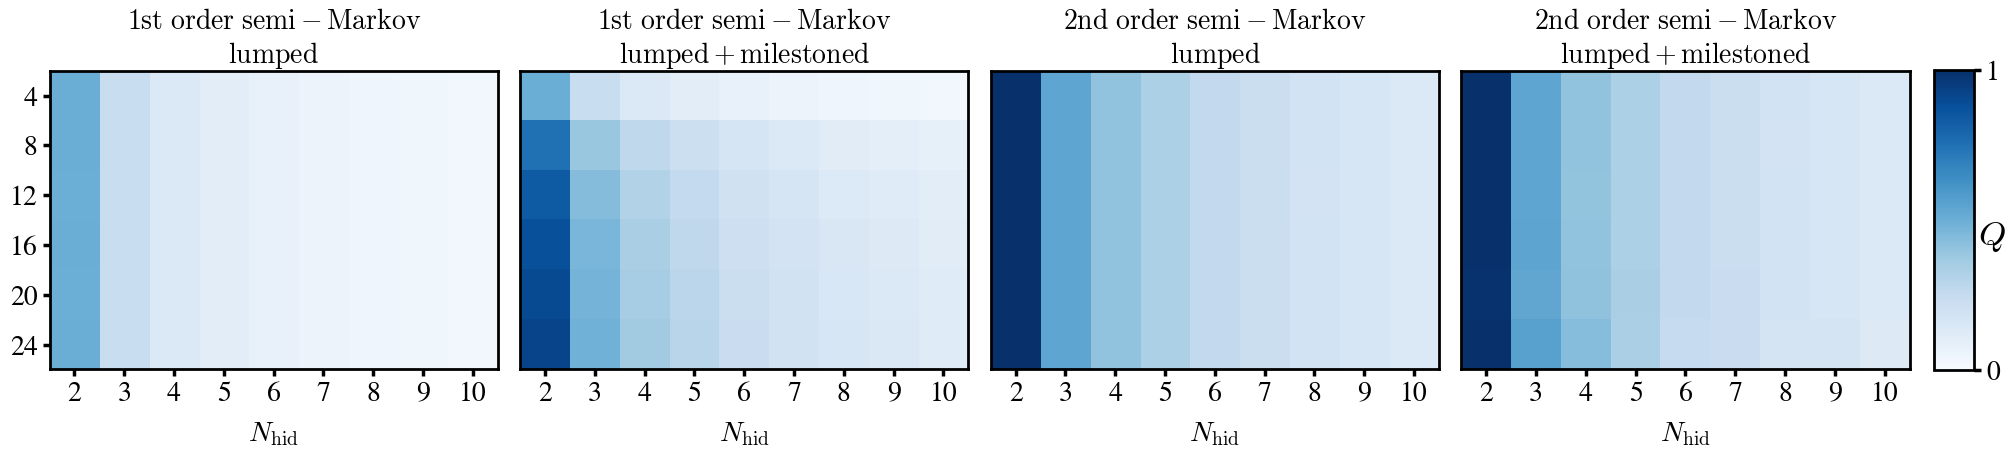

In [309]:
#Figure settings
fig, ax = plt.subplots(1,4, figsize = (24,4))
ax.ravel()

#Plot quality factors
ax[0].matshow(QA1_lumped, cmap='Blues', vmin = 0, vmax = 1);
ax[1].matshow(QA1_mil,    cmap='Blues', vmin = 0, vmax = 1);
ax[2].matshow(QA2_lumped, cmap='Blues', vmin = 0, vmax = 1);
ax[3].matshow(QA2_mil,    cmap='Blues', vmin = 0, vmax = 1);

#Set labels
ax[0].set_xlabel(r'$N_{\rm hid}$', size = 20, labelpad = 10);
ax[1].set_xlabel(r'$N_{\rm hid}$', size = 20, labelpad = 10);
ax[2].set_xlabel(r'$N_{\rm hid}$', size = 20, labelpad = 10);
ax[3].set_xlabel(r'$N_{\rm hid}$', size = 20, labelpad = 10);


#Add titles
ax[0].set_title(r'$\rm 1st \ order \ semi-Markov$' +'\n'+ r'$\rm lumped$',     fontsize = 20);
ax[1].set_title(r'$\rm 1st \ order \ semi-Markov$' +'\n'+ r'$\rm lumped + milestoned$',     fontsize = 20);
ax[2].set_title(r'$\rm 2nd \ order \ semi-Markov$' +'\n'+ r'$\rm lumped$',     fontsize = 20);
ax[3].set_title(r'$\rm 2nd \ order \ semi-Markov$' +'\n'+ r'$\rm lumped + milestoned$',     fontsize = 20);

#Change axis
ax[0].xaxis.set_ticks_position("bottom")
ax[1].xaxis.set_ticks_position("bottom")
ax[2].xaxis.set_ticks_position("bottom")
ax[3].xaxis.set_ticks_position("bottom")

#Set axis ticks
ax[0].set_yticks([0,1,2,3,4,5],['4','8','12','16','20','24'])
ax[1].set_yticks([]), ax[2].set_yticks([]), ax[3].set_yticks([])

#Set tick sizes
ax[0].tick_params('both', length=5, width=2.5, which='major');
ax[1].tick_params('both', length=5, width=2.5, which='major');
ax[2].tick_params('both', length=5, width=2.5, which='major');
ax[3].tick_params('both', length=5, width=2.5, which='major');
ax[0].xaxis.set_tick_params(labelsize=20), ax[0].yaxis.set_tick_params(labelsize=20);
ax[1].xaxis.set_tick_params(labelsize=20), ax[1].yaxis.set_tick_params(labelsize=20);
ax[2].xaxis.set_tick_params(labelsize=20), ax[2].yaxis.set_tick_params(labelsize=20);
ax[3].xaxis.set_tick_params(labelsize=20), ax[3].yaxis.set_tick_params(labelsize=20);

#Set axis ticks
ax[0].set_xticks([0,1,2,3,4,5,6,7,8],['2','3','4','5','6','7','8','9','10']);
ax[1].set_xticks([0,1,2,3,4,5,6,7,8],['2','3','4','5','6','7','8','9','10']);
ax[2].set_xticks([0,1,2,3,4,5,6,7,8],['2','3','4','5','6','7','8','9','10']);
ax[3].set_xticks([0,1,2,3,4,5,6,7,8],['2','3','4','5','6','7','8','9','10']);

#Adjust width subplots
plt.subplots_adjust(wspace=0.05)

#Add a colorbar
norm = mpl.colors.Normalize(vmin=0, vmax=1)
cmap = mpl.cm.ScalarMappable(norm = norm, cmap='Blues')
cax = plt.axes([0.91, 0.12, 0.017, 0.75])
cb = plt.colorbar(cmap, cax=cax, ticks = np.array([0,1]))
cb.ax.set_yticklabels(['0','1'])
cb.ax.tick_params(labelsize=20, length = 5, width = 2.5)
#cb.set_label(r'$\dot{S}$', size = 25, rotation=0, labelpad = -6, y = 0.5)
cb.set_label(r'$Q$', size = 25, rotation=0, labelpad = -6, y = 0.5)

#Save figure
#plt.savefig('./Plots/quality_factor_ringA.pdf', bbox_inches = 'tight', dpi = 200)

### Model B: Calculate entropy production  for various lumped and hidden states

In [ ]:
#Set constants
Nsteps = 10**8
Nmilestones = 4
pbias = 0.4
Nmicrostates = 9

#Initialize arrays
QB1_lumped        = np.zeros((6,Nmicrostates))
QB2_lumped        = np.zeros((6,Nmicrostates))
QB1_mil           = np.zeros((6,Nmicrostates))
QB2_mil           = np.zeros((6,Nmicrostates))

In [ ]:
%%time
for i in range(1,7):
    for j in range(2,2+Nmicrostates):

        #Construct trajectories (0)
        full_traj, lump_traj, mil_traj = ringgenerator(4*i,j,Nsteps,Nmilestones,pbias,pbias, False)
        
        #Calculate entropy production
        exact_entropy  = markov_entropy_calculator(full_traj,1)
        lump1_entropy  = markov_entropy_calculator(lump_traj,1)
        mil1_entropy   = markov_entropy_calculator(mil_traj,1)
        lump2_entropy  = semi_markov_entropy_module(lump_traj,2)
        mil2_entropy   = semi_markov_entropy_module(mil_traj,2)

        #Calculate quality factors
        QB1_lumped[i-1,j-2]    = lump1_entropy/exact_entropy
        QB1_mil[i-1,j-2]       = mil1_entropy/exact_entropy
        QB2_lumped[i-1,j-2]    = lump2_entropy/exact_entropy
        QB2_mil[i-1,j-2]       = mil2_entropy/exact_entropy
        
        print(i,j,QB1_lumped[i-1,j-2],QB1_mil[i-1,j-2],QB2_lumped[i-1,j-2],QB2_mil[i-1,j-2])

### Show raw data

QB1_lumped = np.array([[0.49991206, 0.33063718, 0.23708993, 0.18392406, 0.14361236,
        0.12723091, 0.10573199, 0.08877074, 0.07676435],
       [0.50001013, 0.33116567, 0.23730924, 0.18425878, 0.14364457,
        0.12700791, 0.10536605, 0.08890317, 0.07650196],
       [0.4999933 , 0.33082897, 0.23742579, 0.18411167, 0.14361455,
        0.12626332, 0.10576446, 0.08881784, 0.07649187],
       [0.49998814, 0.33045866, 0.23746899, 0.18407635, 0.14410595,
        0.12672352, 0.10550423, 0.08897223, 0.07671405],
       [0.49998374, 0.33100223, 0.23718056, 0.18477228, 0.14362495,
        0.12668428, 0.10574454, 0.08899492, 0.07629855],
       [0.4999824 , 0.33080372, 0.23707404, 0.18443287, 0.1437113 ,
        0.12680246, 0.10584069, 0.0890866 , 0.07672104]])

QB1_mil = np.array([[0.49991197, 0.33063718, 0.23708993, 0.18392406, 0.14361236,
        0.12723091, 0.10573199, 0.08877074, 0.07676435],
       [0.75012551, 0.45074236, 0.3530026 , 0.29129988, 0.23976625,
        0.21592399, 0.18520604, 0.16332072, 0.14362758],
       [0.83303839, 0.47672076, 0.37553692, 0.31054422, 0.25566421,
        0.22748626, 0.19658474, 0.1724219 , 0.15140596],
       [0.87625648, 0.48858197, 0.38605262, 0.31959013, 0.26401914,
        0.23404035, 0.20109187, 0.17675537, 0.15562402],
       [0.89955089, 0.4969192 , 0.39194649, 0.32626677, 0.26741594,
        0.23764948, 0.20477887, 0.1796058 , 0.15665265],
       [0.91675115, 0.50014426, 0.39619259, 0.32903982, 0.27065177,
        0.2400756 , 0.20668122, 0.18069189, 0.1592401 ]])

QB2_lumped = np.array([[0.99986383, 0.56940221, 0.4682783 , 0.39771057, 0.33575325,
        0.30533779, 0.26575449, 0.23725029, 0.21145785],
       [0.99991243, 0.57033536, 0.46872203, 0.39835914, 0.33598783,
        0.30493538, 0.26489815, 0.23775965, 0.2108478 ],
       [0.99991975, 0.56976876, 0.46890608, 0.39837473, 0.3356112 ,
        0.30318345, 0.26575443, 0.23732109, 0.21086051],
       [1.00011342, 0.5691439 , 0.46943489, 0.39769963, 0.33691041,
        0.30412128, 0.26516685, 0.23778064, 0.21137667],
       [1.00011572, 0.57005465, 0.46864988, 0.39935917, 0.33586197,
        0.30431099, 0.265811  , 0.23786802, 0.21030636],
       [0.99988462, 0.56961989, 0.46841159, 0.3987095 , 0.33565529,
        0.30462273, 0.26597666, 0.23815897, 0.21149441]])

QB2_mil = np.array([[0.99986387, 0.56940221, 0.4682783 , 0.39771057, 0.33575325,
        0.30533779, 0.26575449, 0.23725029, 0.21145785],
       [0.9993604 , 0.52803913, 0.41909334, 0.34901171, 0.28662311,
        0.25387215, 0.21635248, 0.1902333 , 0.16675783],
       [0.99652441, 0.52424065, 0.41690061, 0.34715008, 0.28572331,
        0.25018041, 0.21714279, 0.18959277, 0.16610718],
       [1.00148202, 0.52307078, 0.41812058, 0.3453793 , 0.28699782,
        0.25309848, 0.21570466, 0.18932012, 0.16689392],
       [0.99469544, 0.5238063 , 0.41777708, 0.34721096, 0.28511582,
        0.25215507, 0.21734961, 0.18958595, 0.1656793 ],
       [0.9966766 , 0.52416174, 0.41414964, 0.34703637, 0.28269305,
        0.25228994, 0.21771001, 0.1862707 , 0.16601117]])

### Plot data

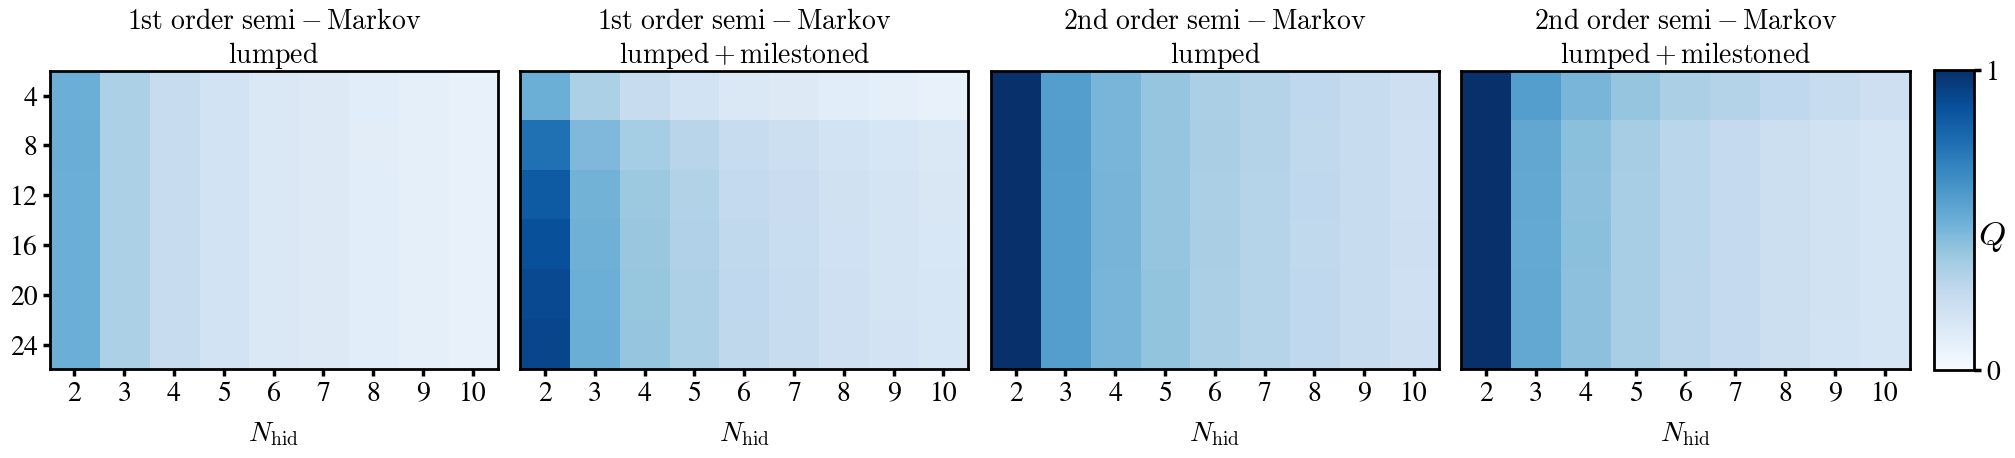

In [314]:
#Figure settings
fig, ax = plt.subplots(1,4, figsize = (24,4))
ax.ravel()

#Plot quality factors
ax[0].matshow(QB1_lumped, cmap='Blues', vmin = 0, vmax = 1);
ax[1].matshow(QB1_mil,    cmap='Blues', vmin = 0, vmax = 1);
ax[2].matshow(QB2_lumped, cmap='Blues', vmin = 0, vmax = 1);
ax[3].matshow(QB2_mil,    cmap='Blues', vmin = 0, vmax = 1);

#Set labels
ax[0].set_xlabel(r'$N_{\rm hid}$', size = 20, labelpad = 10);
ax[1].set_xlabel(r'$N_{\rm hid}$', size = 20, labelpad = 10);
ax[2].set_xlabel(r'$N_{\rm hid}$', size = 20, labelpad = 10);
ax[3].set_xlabel(r'$N_{\rm hid}$', size = 20, labelpad = 10);


#Add titles
ax[0].set_title(r'$\rm 1st \ order \ semi-Markov$' +'\n'+ r'$\rm lumped$',     fontsize = 20);
ax[1].set_title(r'$\rm 1st \ order \ semi-Markov$' +'\n'+ r'$\rm lumped + milestoned$',     fontsize = 20);
ax[2].set_title(r'$\rm 2nd \ order \ semi-Markov$' +'\n'+ r'$\rm lumped$',     fontsize = 20);
ax[3].set_title(r'$\rm 2nd \ order \ semi-Markov$' +'\n'+ r'$\rm lumped + milestoned$',     fontsize = 20);

#Change axis
ax[0].xaxis.set_ticks_position("bottom")
ax[1].xaxis.set_ticks_position("bottom")
ax[2].xaxis.set_ticks_position("bottom")
ax[3].xaxis.set_ticks_position("bottom")

#Set axis ticks
ax[0].set_yticks([0,1,2,3,4,5],['4','8','12','16','20','24'])
ax[1].set_yticks([]), ax[2].set_yticks([]), ax[3].set_yticks([])

#Set tick sizes
ax[0].tick_params('both', length=5, width=2.5, which='major');
ax[1].tick_params('both', length=5, width=2.5, which='major');
ax[2].tick_params('both', length=5, width=2.5, which='major');
ax[3].tick_params('both', length=5, width=2.5, which='major');
ax[0].xaxis.set_tick_params(labelsize=20), ax[0].yaxis.set_tick_params(labelsize=20);
ax[1].xaxis.set_tick_params(labelsize=20), ax[1].yaxis.set_tick_params(labelsize=20);
ax[2].xaxis.set_tick_params(labelsize=20), ax[2].yaxis.set_tick_params(labelsize=20);
ax[3].xaxis.set_tick_params(labelsize=20), ax[3].yaxis.set_tick_params(labelsize=20);

#Set axis ticks
ax[0].set_xticks([0,1,2,3,4,5,6,7,8],['2','3','4','5','6','7','8','9','10']);
ax[1].set_xticks([0,1,2,3,4,5,6,7,8],['2','3','4','5','6','7','8','9','10']);
ax[2].set_xticks([0,1,2,3,4,5,6,7,8],['2','3','4','5','6','7','8','9','10']);
ax[3].set_xticks([0,1,2,3,4,5,6,7,8],['2','3','4','5','6','7','8','9','10']);

#Adjust width subplots
plt.subplots_adjust(wspace=0.05)

#Add a colorbar
norm = mpl.colors.Normalize(vmin=0, vmax=1)
cmap = mpl.cm.ScalarMappable(norm = norm, cmap='Blues')
cax = plt.axes([0.91, 0.12, 0.017, 0.75])
cb = plt.colorbar(cmap, cax=cax, ticks = np.array([0,1]))
cb.ax.set_yticklabels(['0','1'])
cb.ax.tick_params(labelsize=20, length = 5, width = 2.5)
cb.set_label(r'$Q$', size = 25, rotation=0, labelpad = -6, y = 0.5)

#Save figure
#plt.savefig('./Plots/quality_factor_ringB.pdf', bbox_inches = 'tight', dpi = 200)